# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # pause for 1 second using time.sleep() - avoids the Openweather API Key from being disabled
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append(
            {
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            }
        )

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nyirbator
Processing Record 2 of Set 1 | yanbu
Processing Record 3 of Set 1 | bandon
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | gulf shores
Processing Record 6 of Set 1 | liupanshui
City not found. Skipping...
Processing Record 7 of Set 1 | irece
Processing Record 8 of Set 1 | ilebo
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | howard springs
Processing Record 11 of Set 1 | whakatane
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | san luis de la loma
Processing Record 17 of Set 1 | lazaro cardenas
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | tolanaro
Processing Reco

In [11]:
# Convert the cities weather data into a Pandas DataFrame
cityDataDF = pd.DataFrame(city_data)

# Show Record Count
cityDataDF.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [13]:
# Display sample data
cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nyirbator,47.8333,22.1333,33.42,88,100,6.33,HU,1740542963
1,yanbu,24.0891,38.0637,68.04,40,40,6.91,SA,1740542965
2,bandon,51.7469,-8.7425,42.39,84,7,11.90,IE,1740542967
3,puerto natales,-51.7236,-72.4875,41.92,70,30,12.10,CL,1740542670
4,gulf shores,30.2460,-87.7008,60.03,85,0,5.75,US,1740542763


In [15]:
# Export the City_Data into a csv
cityDataDF.to_csv("../output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
cityDataDF = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nyirbator,47.8333,22.1333,33.42,88,100,6.33,HU,1740542963
1,yanbu,24.0891,38.0637,68.04,40,40,6.91,SA,1740542965
2,bandon,51.7469,-8.7425,42.39,84,7,11.90,IE,1740542967
3,puerto natales,-51.7236,-72.4875,41.92,70,30,12.10,CL,1740542670
4,gulf shores,30.2460,-87.7008,60.03,85,0,5.75,US,1740542763


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

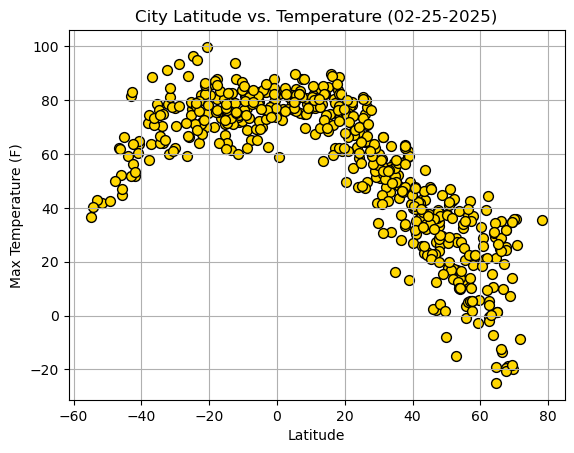

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    cityDataDF["Lat"],
    cityDataDF["Max Temp"],
    color="gold",
    edgecolor="black",
    linewidths=1,
    marker="o",  # Corrected from 'markear' to 'marker'
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)"% time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

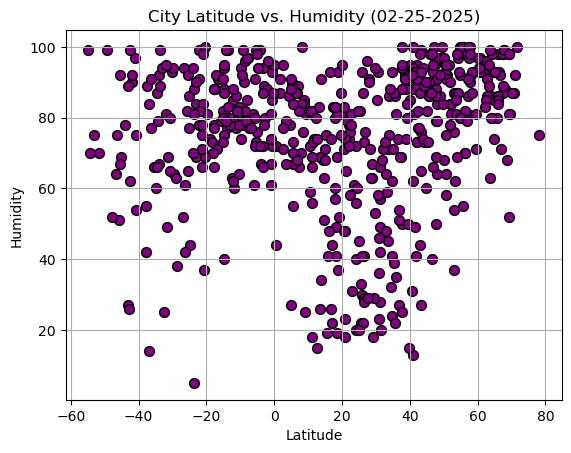

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    cityDataDF["Lat"],
    cityDataDF["Humidity"],
    color="purple",
    edgecolor="black",
    linewidths=1,
    marker="o",  # Corrected from 'markear' to 'marker'
    label="Cities",
    s=50
)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

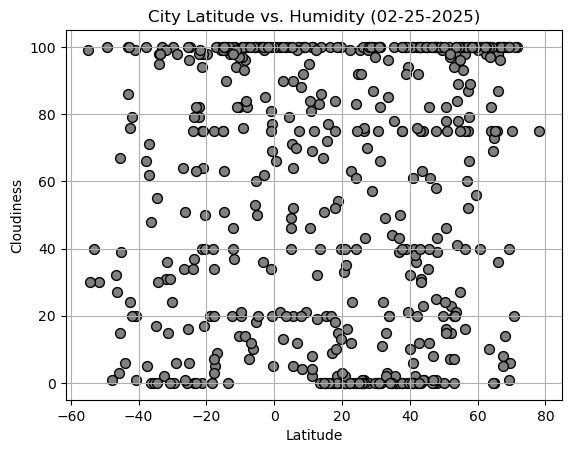

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    cityDataDF["Lat"],
    cityDataDF["Cloudiness"],
    color="gray",
    edgecolor="black",
    linewidths=1,
    marker="o",  # Corrected from 'markear' to 'marker'
    label="Cities",
    s=50
)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

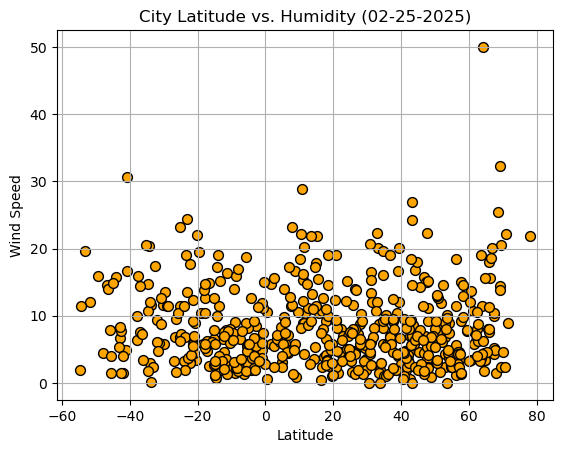

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    cityDataDF["Lat"],
    cityDataDF["Wind Speed"],
    color="Orange",
    edgecolor="black",
    linewidths=1,
    marker="o",  # Corrected from 'markear' to 'marker'
    label="Cities",
    s=50
)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    # Compute Linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter (x_values, y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate (line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = cityDataDF.loc[(cityDataDF["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nyirbator,47.8333,22.1333,33.42,88,100,6.33,HU,1740542963
1,yanbu,24.0891,38.0637,68.04,40,40,6.91,SA,1740542965
2,bandon,51.7469,-8.7425,42.39,84,7,11.90,IE,1740542967
4,gulf shores,30.2460,-87.7008,60.03,85,0,5.75,US,1740542763
13,iqaluit,63.7506,-68.5145,-7.31,63,100,18.99,CA,1740542992


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = cityDataDF.loc[(cityDataDF["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,41.92,70,30,12.10,CL,1740542670
5,irece,-11.3042,-41.8558,71.76,77,94,16.35,BR,1740542738
6,ilebo,-4.3167,20.5833,69.96,99,100,1.95,CD,1740542977
7,alofi,-19.0595,-169.9187,85.89,74,20,10.36,NU,1740542979
8,howard springs,-12.4970,131.0470,93.97,63,20,6.51,AU,1740542982


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7722056713515397


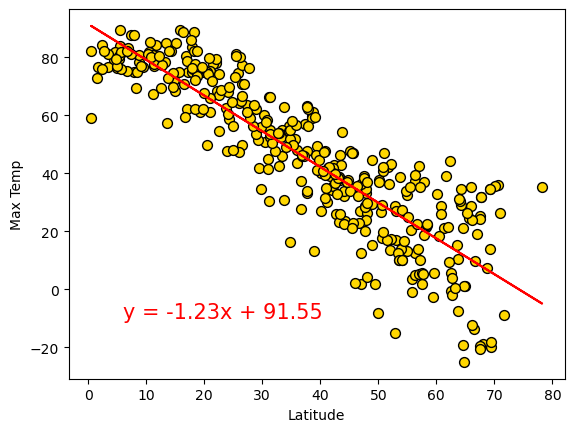

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10),"gold")

The r-value is: 0.30385166730558655


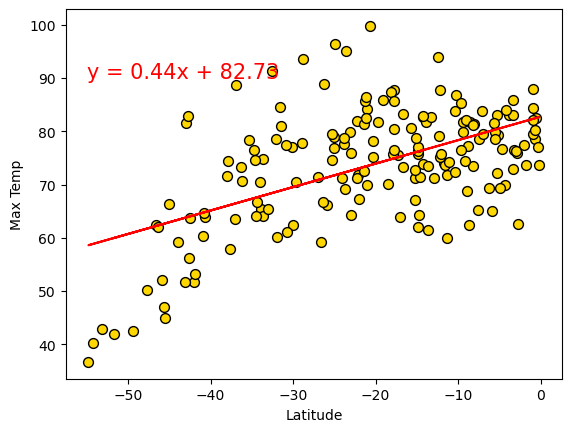

In [55]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,90),"gold")

**Discussion about the linear relationship:** The r value for the northern hemisphere shows there is a strong positive correlation between latitude and max tempreture in the North. The r value for the southern hemisphere indicates weak postitive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1383831262690956


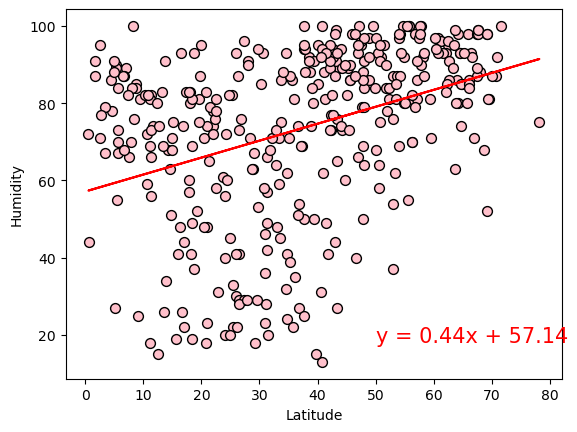

In [57]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50,18),"pink")

The r-value is: 0.05390681827934903


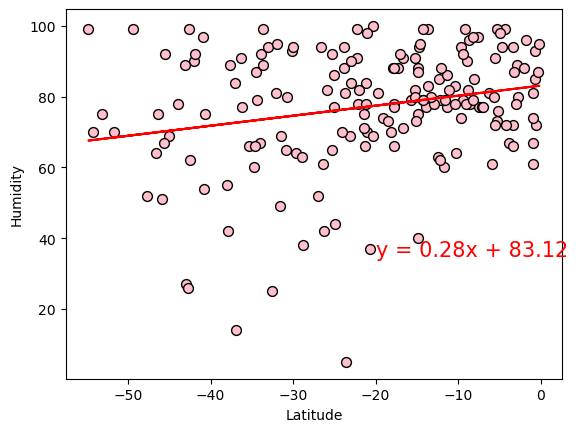

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-20,35),"pink")

**Discussion about the linear relationship:** The low r values in both hemispheres show there is weak to no relationship between latitude and humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.039953950814195234


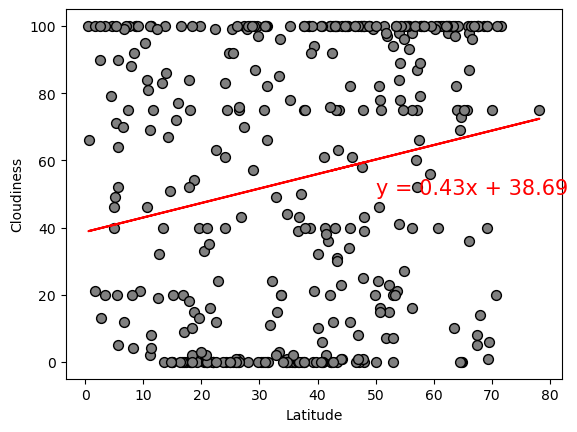

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (50,50),"gray")

The r-value is: 0.07321586655538546


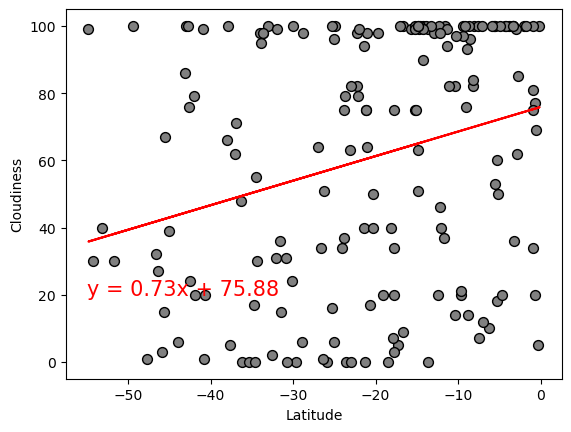

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,20),"gray")

**Discussion about the linear relationship:** The low r values for both the northern and southern hemisphere indicate there is weak to no correlation between cloudiness and latitiudes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 2.573959701706723e-07


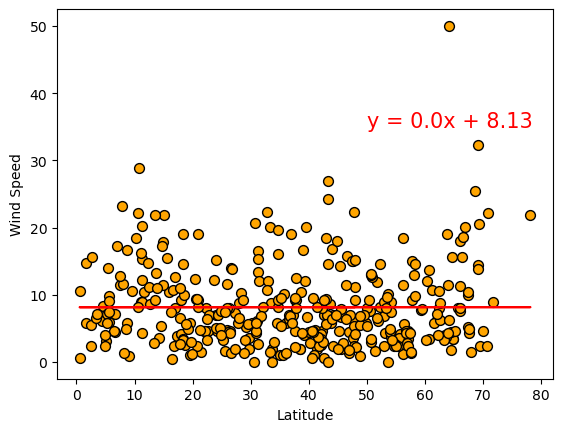

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (50,35),"orange")

The r-value is: 0.05273256762953754


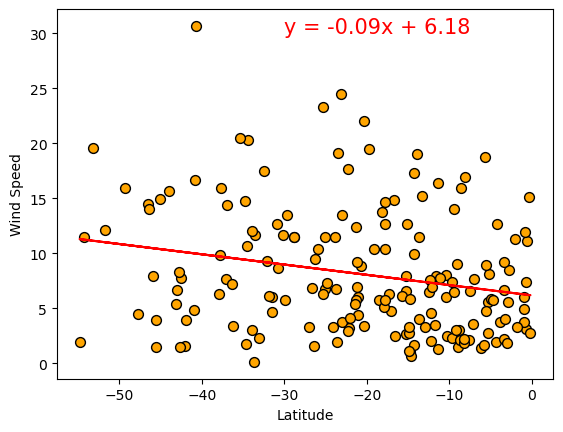

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-30,30),"orange")

**Discussion about the linear relationship:** The higher r value indicates a strong positive correlation between latitued and wind speed in northern hemisphere, and lower r value in southern hemisphere indicates there is weak to no correlation in southern hemisphere (due to the season).